In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import itertools

In [16]:
# set datetime index
df = pd.read_csv("Sprint_Resampled Data.csv")
df['Date'] = df['Date'].apply(pd.to_datetime)
df = df.set_index('Date')
df.columns
df = df["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"]
df = df.dropna()
df = df['1991' : '2019']

In [17]:
train = df[:int(0.9*(len(df)))]
valid = df[int(0.9*(len(df))):]
order = (1,1,1)
seasonal_order = (1,0,1,12)
model = SARIMAX(train,order = order, seasonal_order=seasonal_order,trend = 'ct')
# fit model
model_fit = model.fit()
# one step forecast
# Model[[(0, 0, 0), (1, 0, 1, 0), 'n']] 5.253

C:\Users\villy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\villy\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [18]:
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1])

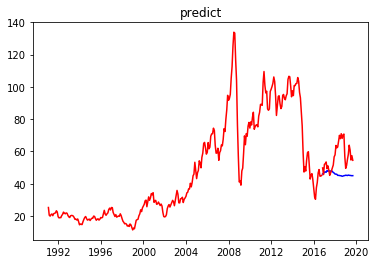

In [19]:
plt.plot(yhat, color = 'blue', label = 'yhat')
plt.plot(valid, color = 'red', label = 'valid')
plt.plot(train,color = 'red')
plt.title('predict')
plt.show()

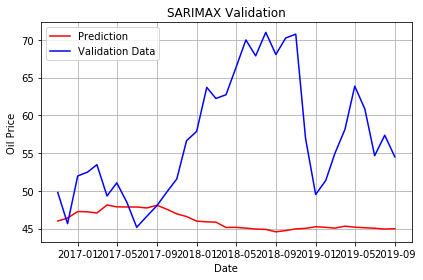

In [21]:
plt.plot(yhat, label = 'Prediction',color = "red")
plt.plot(valid, label = 'Validation Data',color= "blue")
plt.xlabel("Date")
plt.ylabel("Oil Price")
plt.title("SARIMAX Validation")

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [24]:
# training 
order = (1,1,1)
seasonal_order = (1,0,1,12)
model = SARIMAX(df,order = order, seasonal_order=seasonal_order,trend = 'ct')
# fit model
model_fit = model.fit()
# one step forecast
# Model[[(0, 0, 0), (1, 0, 1, 0), 'n']] 5.253

C:\Users\villy\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\villy\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [25]:
yhat = model_fit.predict(start=valid.index[0], end="2021-1")

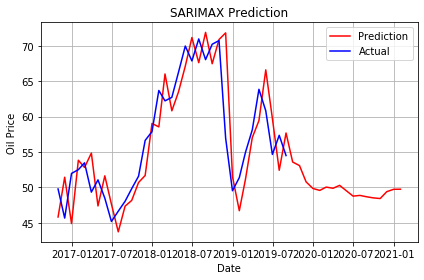

In [26]:
plt.plot(yhat,  label = "Prediction",color = "red")
plt.plot(valid, label = "Actual",color = "blue")
plt.xlabel("Date")
plt.ylabel("Oil Price")
plt.title("SARIMAX Prediction")
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

In [28]:
yhat["2020"]
# type(yhat)

2020-01-31    49.572305
2020-02-29    50.039604
2020-03-31    49.872328
2020-04-30    50.284176
2020-05-31    49.508929
2020-06-30    48.762657
2020-07-31    48.862601
2020-08-31    48.667828
2020-09-30    48.513554
2020-10-31    48.422207
2020-11-30    49.398608
2020-12-31    49.727630
Freq: M, dtype: float64

In [11]:
np.mean(yhat["2020"])

49.302702232130464